![rmotr](https://user-images.githubusercontent.com/7065401/52071918-bda15380-2562-11e9-828c-7f95297e4a82.png)
<hr style="margin-bottom: 40px;">

<img src="https://user-images.githubusercontent.com/7065401/75165824-badf4680-5701-11ea-9c5b-5475b0a33abf.png"
    style="width:300px; float: right; margin: 0 40px 40px 40px;"></img>

# Pandas - `DataFrame`s

Probably the most important data structure of pandas is the `DataFrame`. It's a tabular structure tightly integrated with `Series`.


![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## Hands on! 

In [1]:
import numpy as np
import pandas as pd

We'll keep our analysis of G7 countries and looking now at DataFrames. As said, a DataFrame looks a lot like a table (as the one you can appreciate [here](https://docs.google.com/spreadsheets/d/1IlorV2-Oh9Da1JAZ7weVw86PQrQydSMp-ydVMH135iI/edit?usp=sharing)):

<img width="700" src="https://user-images.githubusercontent.com/872296/38153492-72c032ca-3443-11e8-80f4-9de9060a5127.png" />

Creating `DataFrame`s manually can be tedious. 99% of the time you'll be pulling the data from a Database, a csv file or the web. But still, you can create a DataFrame by specifying the columns and values:

In [2]:
df = pd.DataFrame({
    'Population': [35.467, 63.951, 80.94 , 60.665, 127.061, 64.511, 318.523],
    'GDP': [
        1785387,
        2833687,
        3874437,
        2167744,
        4602367,
        2950039,
        17348075
    ],
    'Surface Area': [
        9984670,
        640679,
        357114,
        301336,
        377930,
        242495,
        9525067
    ],
    'HDI': [
        0.913,
        0.888,
        0.916,
        0.873,
        0.891,
        0.907,
        0.915
    ],
    'Continent': [
        'America',
        'Europe',
        'Europe',
        'Europe',
        'Asia',
        'Europe',
        'America'
    ]
}, columns=['Population', 'GDP', 'Surface Area', 'HDI', 'Continent'])

_(The `columns` attribute is optional. I'm using it to keep the same order as in the picture above)_

In [3]:
df

,Population,GDP,Surface Area,HDI,Continent
0,35.467,1785387,9984670,0.913,America
1,63.951,2833687,640679,0.888,Europe
2,80.940,3874437,357114,0.916,Europe
3,60.665,2167744,301336,0.873,Europe
4,127.061,4602367,377930,0.891,Asia
5,64.511,2950039,242495,0.907,Europe
6,318.523,17348075,9525067,0.915,America


`DataFrame`s also have indexes. As you can see in the "table" above, pandas has assigned a numeric, autoincremental index automatically to each "row" in our DataFrame. In our case, we know that each row represents a country, so we'll just reassign the index:

In [4]:
df.index = [
    'Canada',
    'France',
    'Germany',
    'Italy',
    'Japan',
    'United Kingdom',
    'United States',
]

In [5]:
df

,Population,GDP,Surface Area,HDI,Continent
Canada,35.467,1785387,9984670,0.913,America
France,63.951,2833687,640679,0.888,Europe
Germany,80.940,3874437,357114,0.916,Europe
Italy,60.665,2167744,301336,0.873,Europe
Japan,127.061,4602367,377930,0.891,Asia
United Kingdom,64.511,2950039,242495,0.907,Europe
United States,318.523,17348075,9525067,0.915,America


In [25]:
df.columns

Index(['Population', 'GDP', 'Surface Area', 'HDI', 'Continent'], dtype='object')

In [27]:
df.index

Index(['Canada', 'France', 'Germany', 'Italy', 'Japan', 'United Kingdom',
       'United States'],
      dtype='object')

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7 entries, Canada to United States
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Population    7 non-null      float64
 1   GDP           7 non-null      int64  
 2   Surface Area  7 non-null      int64  
 3   HDI           7 non-null      float64
 4   Continent     7 non-null      object 
dtypes: float64(2), int64(2), object(1)
memory usage: 336.0+ bytes


In [29]:
df.size

35

In [30]:
df.shape

(7, 5)

In [31]:
df.describe()

,Population,GDP,Surface Area,HDI
count,7.000000,7.000000e+00,7.000000e+00,7.000000
mean,107.302571,5.080248e+06,3.061327e+06,0.900429
std,97.249970,5.494020e+06,4.576187e+06,0.016592
min,35.467000,1.785387e+06,2.424950e+05,0.873000
25%,62.308000,2.500716e+06,3.292250e+05,0.889500
50%,64.511000,2.950039e+06,3.779300e+05,0.907000
75%,104.000500,4.238402e+06,5.082873e+06,0.914000
max,318.523000,1.734808e+07,9.984670e+06,0.916000


In [32]:
df.dtypes

Population      float64
GDP               int64
Surface Area      int64
HDI             float64
Continent        object
dtype: object

In [33]:
df.dtypes.value_counts()

float64    2
int64      2
object     1
Name: count, dtype: int64

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Indexing, Selection and Slicing

Individual columns in the DataFrame can be selected with regular indexing. Each column is represented as a `Series`:

In [34]:
df

,Population,GDP,Surface Area,HDI,Continent
Canada,35.467,1785387,9984670,0.913,America
France,63.951,2833687,640679,0.888,Europe
Germany,80.940,3874437,357114,0.916,Europe
Italy,60.665,2167744,301336,0.873,Europe
Japan,127.061,4602367,377930,0.891,Asia
United Kingdom,64.511,2950039,242495,0.907,Europe
United States,318.523,17348075,9525067,0.915,America


In [35]:
df.loc['Canada']

Population       35.467
GDP             1785387
Surface Area    9984670
HDI               0.913
Continent       America
Name: Canada, dtype: object

In [36]:
df.iloc[-1]

Population       318.523
GDP             17348075
Surface Area     9525067
HDI                0.915
Continent        America
Name: United States, dtype: object

In [37]:
df['Population']

Canada             35.467
France             63.951
Germany            80.940
Italy              60.665
Japan             127.061
United Kingdom     64.511
United States     318.523
Name: Population, dtype: float64

Note that the `index` of the returned Series is the same as the DataFrame one. And its `name` is the name of the column. If you're working on a notebook and want to see a more DataFrame-like format you can use the `to_frame` method:

In [38]:
df['Population'].to_frame()

,Population
Canada,35.467
France,63.951
Germany,80.940
Italy,60.665
Japan,127.061
United Kingdom,64.511
United States,318.523


Multiple columns can also be selected similarly to `numpy` and `Series`:

In [39]:
df[['Population', 'GDP']]

,Population,GDP
Canada,35.467,1785387
France,63.951,2833687
Germany,80.940,3874437
Italy,60.665,2167744
Japan,127.061,4602367
United Kingdom,64.511,2950039
United States,318.523,17348075


In this case, the result is another `DataFrame`. Slicing works differently, it acts at "row level", and can be counter intuitive:

In [40]:
df[1:3]

,Population,GDP,Surface Area,HDI,Continent
France,63.951,2833687,640679,0.888,Europe
Germany,80.940,3874437,357114,0.916,Europe


Row level selection works better with `loc` and `iloc` **which are recommended** over regular "direct slicing" (`df[:]`).

`loc` selects rows matching the given index:

In [41]:
df.loc['Italy']

Population       60.665
GDP             2167744
Surface Area     301336
HDI               0.873
Continent        Europe
Name: Italy, dtype: object

In [42]:
df.loc['France': 'Italy']

,Population,GDP,Surface Area,HDI,Continent
France,63.951,2833687,640679,0.888,Europe
Germany,80.940,3874437,357114,0.916,Europe
Italy,60.665,2167744,301336,0.873,Europe


As a second "argument", you can pass the column(s) you'd like to select:

In [43]:
df.loc['France': 'Italy', 'Population']

France     63.951
Germany    80.940
Italy      60.665
Name: Population, dtype: float64

In [44]:
df.loc['France': 'Italy', ['Population', 'GDP']]

,Population,GDP
France,63.951,2833687
Germany,80.940,3874437
Italy,60.665,2167744


`iloc` works with the (numeric) "position" of the index:

In [45]:
df

,Population,GDP,Surface Area,HDI,Continent
Canada,35.467,1785387,9984670,0.913,America
France,63.951,2833687,640679,0.888,Europe
Germany,80.940,3874437,357114,0.916,Europe
Italy,60.665,2167744,301336,0.873,Europe
Japan,127.061,4602367,377930,0.891,Asia
United Kingdom,64.511,2950039,242495,0.907,Europe
United States,318.523,17348075,9525067,0.915,America


In [46]:
df.iloc[0]

Population       35.467
GDP             1785387
Surface Area    9984670
HDI               0.913
Continent       America
Name: Canada, dtype: object

In [47]:
df.iloc[-1]

Population       318.523
GDP             17348075
Surface Area     9525067
HDI                0.915
Continent        America
Name: United States, dtype: object

In [48]:
df.iloc[[0, 1, -1]]

,Population,GDP,Surface Area,HDI,Continent
Canada,35.467,1785387,9984670,0.913,America
France,63.951,2833687,640679,0.888,Europe
United States,318.523,17348075,9525067,0.915,America


In [49]:
df.iloc[1:3]

,Population,GDP,Surface Area,HDI,Continent
France,63.951,2833687,640679,0.888,Europe
Germany,80.940,3874437,357114,0.916,Europe


In [50]:
df.iloc[1:3, 3]

France     0.888
Germany    0.916
Name: HDI, dtype: float64

In [51]:
df.iloc[1:3, [0, 3]]

,Population,HDI
France,63.951,0.888
Germany,80.940,0.916


In [52]:
df.iloc[1:3, 1:3]

,GDP,Surface Area
France,2833687,640679
Germany,3874437,357114


> **RECOMMENDED: Always use `loc` and `iloc` to reduce ambiguity, specially with `DataFrame`s with numeric indexes.**

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Conditional selection (boolean arrays)

We saw conditional selection applied to `Series` and it'll work in the same way for `DataFrame`s. After all, a `DataFrame` is a collection of `Series`:

In [53]:
df

,Population,GDP,Surface Area,HDI,Continent
Canada,35.467,1785387,9984670,0.913,America
France,63.951,2833687,640679,0.888,Europe
Germany,80.940,3874437,357114,0.916,Europe
Italy,60.665,2167744,301336,0.873,Europe
Japan,127.061,4602367,377930,0.891,Asia
United Kingdom,64.511,2950039,242495,0.907,Europe
United States,318.523,17348075,9525067,0.915,America


In [54]:
df['Population'] > 70

Canada            False
France            False
Germany            True
Italy             False
Japan              True
United Kingdom    False
United States      True
Name: Population, dtype: bool

In [58]:
df.loc[df['Population'] > 70]

,Population,GDP,Surface Area,HDI,Continent
Germany,80.940,3874437,357114,0.916,Europe
Japan,127.061,4602367,377930,0.891,Asia
United States,318.523,17348075,9525067,0.915,America


The boolean matching is done at Index level, so you can filter by any row, as long as it contains the right indexes. Column selection still works as expected:

In [59]:
df.loc[df['Population'] > 70, 'Population']

Germany           80.940
Japan            127.061
United States    318.523
Name: Population, dtype: float64

In [60]:
df.loc[df['Population'] > 70, ['Population', 'GDP']]

,Population,GDP
Germany,80.940,3874437
Japan,127.061,4602367
United States,318.523,17348075


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Dropping stuff

Opposed to the concept of selection, we have "dropping". Instead of pointing out which values you'd like to _select_ you could point which ones you'd like to `drop`:

In [61]:
df.drop('Canada')

,Population,GDP,Surface Area,HDI,Continent
France,63.951,2833687,640679,0.888,Europe
Germany,80.940,3874437,357114,0.916,Europe
Italy,60.665,2167744,301336,0.873,Europe
Japan,127.061,4602367,377930,0.891,Asia
United Kingdom,64.511,2950039,242495,0.907,Europe
United States,318.523,17348075,9525067,0.915,America


In [62]:
df.drop(['Canada', 'Japan'])

,Population,GDP,Surface Area,HDI,Continent
France,63.951,2833687,640679,0.888,Europe
Germany,80.940,3874437,357114,0.916,Europe
Italy,60.665,2167744,301336,0.873,Europe
United Kingdom,64.511,2950039,242495,0.907,Europe
United States,318.523,17348075,9525067,0.915,America


In [63]:
df.drop(columns=['Population', 'HDI'])

,GDP,Surface Area,Continent
Canada,1785387,9984670,America
France,2833687,640679,Europe
Germany,3874437,357114,Europe
Italy,2167744,301336,Europe
Japan,4602367,377930,Asia
United Kingdom,2950039,242495,Europe
United States,17348075,9525067,America


In [ ]:
df.drop(['Italy', 'Canada'], axis=0)

In [69]:
df.drop(['Population', 'HDI'], axis=1)

,GDP,Surface Area,Continent
Canada,1785387,9984670,America
France,2833687,640679,Europe
Germany,3874437,357114,Europe
Italy,2167744,301336,Europe
Japan,4602367,377930,Asia
United Kingdom,2950039,242495,Europe
United States,17348075,9525067,America


In [70]:
df.drop(['Population', 'HDI'], axis=1)

,GDP,Surface Area,Continent
Canada,1785387,9984670,America
France,2833687,640679,Europe
Germany,3874437,357114,Europe
Italy,2167744,301336,Europe
Japan,4602367,377930,Asia
United Kingdom,2950039,242495,Europe
United States,17348075,9525067,America


In [71]:
df.drop(['Population', 'HDI'], axis='columns')

,GDP,Surface Area,Continent
Canada,1785387,9984670,America
France,2833687,640679,Europe
Germany,3874437,357114,Europe
Italy,2167744,301336,Europe
Japan,4602367,377930,Asia
United Kingdom,2950039,242495,Europe
United States,17348075,9525067,America


In [72]:
df.drop(['Canada', 'Germany'], axis='rows')

,Population,GDP,Surface Area,HDI,Continent
France,63.951,2833687,640679,0.888,Europe
Italy,60.665,2167744,301336,0.873,Europe
Japan,127.061,4602367,377930,0.891,Asia
United Kingdom,64.511,2950039,242495,0.907,Europe
United States,318.523,17348075,9525067,0.915,America


All these `drop` methods return a new `DataFrame`. If you'd like to modify it "in place", you can use the `inplace` attribute (there's an example below).

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Operations

In [73]:
df[['Population', 'GDP']]

,Population,GDP
Canada,35.467,1785387
France,63.951,2833687
Germany,80.940,3874437
Italy,60.665,2167744
Japan,127.061,4602367
United Kingdom,64.511,2950039
United States,318.523,17348075


In [74]:
df[['Population', 'GDP']] / 100

,Population,GDP
Canada,0.35467,17853.87
France,0.63951,28336.87
Germany,0.80940,38744.37
Italy,0.60665,21677.44
Japan,1.27061,46023.67
United Kingdom,0.64511,29500.39
United States,3.18523,173480.75


**Operations with Series** work at a column level, broadcasting down the rows (which can be counter intuitive).

In [75]:
crisis = pd.Series([-1_000_000, -0.3], index=['GDP', 'HDI'])
crisis

GDP   -1000000.0
HDI         -0.3
dtype: float64

In [76]:
df[['GDP', 'HDI']]

,GDP,HDI
Canada,1785387,0.913
France,2833687,0.888
Germany,3874437,0.916
Italy,2167744,0.873
Japan,4602367,0.891
United Kingdom,2950039,0.907
United States,17348075,0.915


In [77]:
df[['GDP', 'HDI']] + crisis

,GDP,HDI
Canada,785387.0,0.613
France,1833687.0,0.588
Germany,2874437.0,0.616
Italy,1167744.0,0.573
Japan,3602367.0,0.591
United Kingdom,1950039.0,0.607
United States,16348075.0,0.615


> 99.99% of operations are immutable

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Modifying DataFrames

It's simple and intuitive, You can add columns, or replace values for columns without issues:

### Adding a new column

In [80]:
langs = pd.Series(
    ['French', 'German', 'Italian'],
    index=['France', 'Germany', 'Italy'],
    name='Language'
)

In [81]:
langs

France      French
Germany     German
Italy      Italian
Name: Language, dtype: object

In [82]:
df['Language'] = langs

In [83]:
df

,Population,GDP,Surface Area,HDI,Continent,Language
Canada,35.467,1785387,9984670,0.913,America,NaN
France,63.951,2833687,640679,0.888,Europe,French
Germany,80.940,3874437,357114,0.916,Europe,German
Italy,60.665,2167744,301336,0.873,Europe,Italian
Japan,127.061,4602367,377930,0.891,Asia,NaN
United Kingdom,64.511,2950039,242495,0.907,Europe,NaN
United States,318.523,17348075,9525067,0.915,America,NaN


---
### Replacing values per column

In [84]:
df['Language'] = 'English'

In [85]:
df

,Population,GDP,Surface Area,HDI,Continent,Language
Canada,35.467,1785387,9984670,0.913,America,English
France,63.951,2833687,640679,0.888,Europe,English
Germany,80.940,3874437,357114,0.916,Europe,English
Italy,60.665,2167744,301336,0.873,Europe,English
Japan,127.061,4602367,377930,0.891,Asia,English
United Kingdom,64.511,2950039,242495,0.907,Europe,English
United States,318.523,17348075,9525067,0.915,America,English


---
### Renaming Columns


In [55]:
df.rename(
    columns={
        'HDI': 'Human Development Index',
        'Anual Popcorn Consumption': 'APC'
    }, index={
        'United States': 'USA',
        'United Kingdom': 'UK',
        'Argentina': 'AR'
    })

,Population,GDP,Surface Area,Human Development Index,Continent,Language
Canada,35.467,1785387,9984670,0.913,America,English
France,63.951,2833687,640679,0.888,Europe,English
Germany,80.940,3874437,357114,0.916,Europe,English
Italy,60.665,2167744,301336,0.873,Europe,English
Japan,127.061,4602367,377930,0.891,Asia,English
UK,64.511,2950039,242495,0.907,Europe,English
USA,318.523,17348075,9525067,0.915,America,English


In [86]:
df.rename(index=str.upper)

,Population,GDP,Surface Area,HDI,Continent,Language
CANADA,35.467,1785387,9984670,0.913,America,English
FRANCE,63.951,2833687,640679,0.888,Europe,English
GERMANY,80.940,3874437,357114,0.916,Europe,English
ITALY,60.665,2167744,301336,0.873,Europe,English
JAPAN,127.061,4602367,377930,0.891,Asia,English
UNITED KINGDOM,64.511,2950039,242495,0.907,Europe,English
UNITED STATES,318.523,17348075,9525067,0.915,America,English


In [88]:
df.rename(index=lambda x: x.lower())

,Population,GDP,Surface Area,HDI,Continent,Language
canada,35.467,1785387,9984670,0.913,America,English
france,63.951,2833687,640679,0.888,Europe,English
germany,80.940,3874437,357114,0.916,Europe,English
italy,60.665,2167744,301336,0.873,Europe,English
japan,127.061,4602367,377930,0.891,Asia,English
united kingdom,64.511,2950039,242495,0.907,Europe,English
united states,318.523,17348075,9525067,0.915,America,English


---
### Dropping columns

In [89]:
df.drop(columns='Language', inplace=True)

In [90]:
df

,Population,GDP,Surface Area,HDI,Continent
Canada,35.467,1785387,9984670,0.913,America
France,63.951,2833687,640679,0.888,Europe
Germany,80.940,3874437,357114,0.916,Europe
Italy,60.665,2167744,301336,0.873,Europe
Japan,127.061,4602367,377930,0.891,Asia
United Kingdom,64.511,2950039,242495,0.907,Europe
United States,318.523,17348075,9525067,0.915,America


---
### Adding values

In [57]:
df.append(pd.Series({
    'Population': 3,
    'GDP': 5
}, name='China'))

,Population,GDP,Surface Area,HDI,Continent,Language
Canada,35.467,1785387.0,9984670.0,0.913,America,English
France,63.951,2833687.0,640679.0,0.888,Europe,English
Germany,80.940,3874437.0,357114.0,0.916,Europe,English
Italy,60.665,2167744.0,301336.0,0.873,Europe,English
Japan,127.061,4602367.0,377930.0,0.891,Asia,English
United Kingdom,64.511,2950039.0,242495.0,0.907,Europe,English
United States,318.523,17348075.0,9525067.0,0.915,America,English
China,3.000,5.0,NaN,NaN,NaN,NaN


Append returns a new `DataFrame`:

In [58]:
df

,Population,GDP,Surface Area,HDI,Continent,Language
Canada,35.467,1785387,9984670,0.913,America,English
France,63.951,2833687,640679,0.888,Europe,English
Germany,80.940,3874437,357114,0.916,Europe,English
Italy,60.665,2167744,301336,0.873,Europe,English
Japan,127.061,4602367,377930,0.891,Asia,English
United Kingdom,64.511,2950039,242495,0.907,Europe,English
United States,318.523,17348075,9525067,0.915,America,English


You can directly set the new index and values to the `DataFrame`:

In [91]:
df.loc['China'] = pd.Series({'Population': 1_400_000_000, 'Continent': 'Asia'})

In [92]:
df

,Population,GDP,Surface Area,HDI,Continent
Canada,3.546700e+01,1785387.0,9984670.0,0.913,America
France,6.395100e+01,2833687.0,640679.0,0.888,Europe
Germany,8.094000e+01,3874437.0,357114.0,0.916,Europe
Italy,6.066500e+01,2167744.0,301336.0,0.873,Europe
Japan,1.270610e+02,4602367.0,377930.0,0.891,Asia
United Kingdom,6.451100e+01,2950039.0,242495.0,0.907,Europe
United States,3.185230e+02,17348075.0,9525067.0,0.915,America
China,1.400000e+09,NaN,NaN,NaN,Asia


We can use `drop` to just remove a row by index:

In [93]:
df.drop('China', inplace=True)

In [94]:
df

,Population,GDP,Surface Area,HDI,Continent
Canada,35.467,1785387.0,9984670.0,0.913,America
France,63.951,2833687.0,640679.0,0.888,Europe
Germany,80.940,3874437.0,357114.0,0.916,Europe
Italy,60.665,2167744.0,301336.0,0.873,Europe
Japan,127.061,4602367.0,377930.0,0.891,Asia
United Kingdom,64.511,2950039.0,242495.0,0.907,Europe
United States,318.523,17348075.0,9525067.0,0.915,America


---
### More radical index changes

In [95]:
df.reset_index()

,index,Population,GDP,Surface Area,HDI,Continent
0,Canada,35.467,1785387.0,9984670.0,0.913,America
1,France,63.951,2833687.0,640679.0,0.888,Europe
2,Germany,80.940,3874437.0,357114.0,0.916,Europe
3,Italy,60.665,2167744.0,301336.0,0.873,Europe
4,Japan,127.061,4602367.0,377930.0,0.891,Asia
5,United Kingdom,64.511,2950039.0,242495.0,0.907,Europe
6,United States,318.523,17348075.0,9525067.0,0.915,America


In [96]:
df.set_index('Population')

,GDP,Surface Area,HDI,Continent
Population,,,,
35.467,1785387.0,9984670.0,0.913,America
63.951,2833687.0,640679.0,0.888,Europe
80.940,3874437.0,357114.0,0.916,Europe
60.665,2167744.0,301336.0,0.873,Europe
127.061,4602367.0,377930.0,0.891,Asia
64.511,2950039.0,242495.0,0.907,Europe
318.523,17348075.0,9525067.0,0.915,America


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Creating columns from other columns

Altering a DataFrame often involves combining different columns into another. For example, in our Countries analysis, we could try to calculate the "GDP per capita", which is just, `GDP / Population`.

In [97]:
df[['Population', 'GDP']]

,Population,GDP
Canada,35.467,1785387.0
France,63.951,2833687.0
Germany,80.940,3874437.0
Italy,60.665,2167744.0
Japan,127.061,4602367.0
United Kingdom,64.511,2950039.0
United States,318.523,17348075.0


The regular pandas way of expressing that, is just dividing each series:

In [98]:
df['GDP'] / df['Population']

Canada            50339.385908
France            44310.284437
Germany           47868.013343
Italy             35733.025633
Japan             36221.712406
United Kingdom    45729.239975
United States     54464.120330
dtype: float64

The result of that operation is just another series that you can add to the original `DataFrame`:

In [99]:
df['GDP Per Capita'] = df['GDP'] / df['Population']

In [100]:
df

,Population,GDP,Surface Area,HDI,Continent,GDP Per Capita
Canada,35.467,1785387.0,9984670.0,0.913,America,50339.385908
France,63.951,2833687.0,640679.0,0.888,Europe,44310.284437
Germany,80.940,3874437.0,357114.0,0.916,Europe,47868.013343
Italy,60.665,2167744.0,301336.0,0.873,Europe,35733.025633
Japan,127.061,4602367.0,377930.0,0.891,Asia,36221.712406
United Kingdom,64.511,2950039.0,242495.0,0.907,Europe,45729.239975
United States,318.523,17348075.0,9525067.0,0.915,America,54464.120330


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Statistical info

You've already seen the `describe` method, which gives you a good "summary" of the `DataFrame`. Let's explore other methods in more detail:

In [101]:
df.head()

,Population,GDP,Surface Area,HDI,Continent,GDP Per Capita
Canada,35.467,1785387.0,9984670.0,0.913,America,50339.385908
France,63.951,2833687.0,640679.0,0.888,Europe,44310.284437
Germany,80.940,3874437.0,357114.0,0.916,Europe,47868.013343
Italy,60.665,2167744.0,301336.0,0.873,Europe,35733.025633
Japan,127.061,4602367.0,377930.0,0.891,Asia,36221.712406


In [102]:
df.describe()

,Population,GDP,Surface Area,HDI,GDP Per Capita
count,7.000000,7.000000e+00,7.000000e+00,7.000000,7.000000
mean,107.302571,5.080248e+06,3.061327e+06,0.900429,44952.254576
std,97.249970,5.494020e+06,4.576187e+06,0.016592,6954.983875
min,35.467000,1.785387e+06,2.424950e+05,0.873000,35733.025633
25%,62.308000,2.500716e+06,3.292250e+05,0.889500,40265.998421
50%,64.511000,2.950039e+06,3.779300e+05,0.907000,45729.239975
75%,104.000500,4.238402e+06,5.082873e+06,0.914000,49103.699626
max,318.523000,1.734808e+07,9.984670e+06,0.916000,54464.120330


In [103]:
population = df['Population']

In [104]:
population.min(), population.max()

(np.float64(35.467), np.float64(318.523))

In [105]:
population.sum()

np.float64(751.118)

In [106]:
population.sum() / len(population)

np.float64(107.30257142857144)

In [107]:
population.mean()

np.float64(107.30257142857144)

In [108]:
population.std()

np.float64(97.24996987121581)

In [109]:
population.median()

np.float64(64.511)

In [110]:
population.describe()

count      7.000000
mean     107.302571
std       97.249970
min       35.467000
25%       62.308000
50%       64.511000
75%      104.000500
max      318.523000
Name: Population, dtype: float64

In [111]:
population.quantile(.25)

np.float64(62.308)

In [112]:
population.quantile([.2, .4, .6, .8, 1])

0.2     61.3222
0.4     64.1750
0.6     74.3684
0.8    117.8368
1.0    318.5230
Name: Population, dtype: float64

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)


![rmotr](https://user-images.githubusercontent.com/7065401/52071918-bda15380-2562-11e9-828c-7f95297e4a82.png)
<hr style="margin-bottom: 40px;">

# Pandas DataFrame exercises


In [1]:
# Import the numpy package under the name np
import numpy as np

# Import the pandas package under the name pd
import pandas as pd

# Import the matplotlib package under the name plt
import matplotlib.pyplot as plt
%matplotlib inline

# Print the pandas version and the configuration
print(pd.__version__)

2.3.3


![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## DataFrame creation

### Create an empty pandas DataFrame


In [5]:
# your code goes here
pd.DataFrame(data=[None],index=[None],columns=[None])

,None
None,None


In [3]:
pd.DataFrame(data=[None],
             index=[None],
             columns=[None])

,None
None,None


<img width=400 src="https://cdn.dribbble.com/users/4678/screenshots/1986600/avengers.png"></img>

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Create a `marvel_df` pandas DataFrame with the given marvel data


In [6]:
marvel_data = [
    ['Spider-Man', 'male', 1962],
    ['Captain America', 'male', 1941],
    ['Wolverine', 'male', 1974],
    ['Iron Man', 'male', 1963],
    ['Thor', 'male', 1963],
    ['Thing', 'male', 1961],
    ['Mister Fantastic', 'male', 1961],
    ['Hulk', 'male', 1962],
    ['Beast', 'male', 1963],
    ['Invisible Woman', 'female', 1961],
    ['Storm', 'female', 1975],
    ['Namor', 'male', 1939],
    ['Hawkeye', 'male', 1964],
    ['Daredevil', 'male', 1964],
    ['Doctor Strange', 'male', 1963],
    ['Hank Pym', 'male', 1962],
    ['Scarlet Witch', 'female', 1964],
    ['Wasp', 'female', 1963],
    ['Black Widow', 'female', 1964],
    ['Vision', 'male', 1968]
]

In [8]:
# your code goes here
marvel_df = pd.DataFrame(marvel_data)
marvel_df

,0,1,2
0,Spider-Man,male,1962
1,Captain America,male,1941
2,Wolverine,male,1974
3,Iron Man,male,1963
4,Thor,male,1963
5,Thing,male,1961
6,Mister Fantastic,male,1961
7,Hulk,male,1962
8,Beast,male,1963
9,Invisible Woman,female,1961


In [ ]:
marvel_df = pd.DataFrame(data=marvel_data)

marvel_df

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Add column names to the `marvel_df`
 

In [11]:
# your code goes here
marvel_df.columns=['name','sex','first_appearance']
marvel_df

,name,sex,first_appearance
0,Spider-Man,male,1962
1,Captain America,male,1941
2,Wolverine,male,1974
3,Iron Man,male,1963
4,Thor,male,1963
5,Thing,male,1961
6,Mister Fantastic,male,1961
7,Hulk,male,1962
8,Beast,male,1963
9,Invisible Woman,female,1961


In [ ]:
col_names = ['name', 'sex', 'first_appearance']

marvel_df.columns = col_names
marvel_df

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Add index names to the `marvel_df` (use the character name as index)


In [13]:
# your code goes here
marvel_df.index = marvel_df['name']
marvel_df

,name,sex,first_appearance
name,,,
Spider-Man,Spider-Man,male,1962
Captain America,Captain America,male,1941
Wolverine,Wolverine,male,1974
Iron Man,Iron Man,male,1963
Thor,Thor,male,1963
Thing,Thing,male,1961
Mister Fantastic,Mister Fantastic,male,1961
Hulk,Hulk,male,1962
Beast,Beast,male,1963


In [ ]:
marvel_df.index = marvel_df['name']
marvel_df

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Drop the name column as it's now the index

In [15]:
# your code goes here
marvel_df.drop(columns='name')

,sex,first_appearance
name,,
Spider-Man,male,1962
Captain America,male,1941
Wolverine,male,1974
Iron Man,male,1963
Thor,male,1963
Thing,male,1961
Mister Fantastic,male,1961
Hulk,male,1962
Beast,male,1963


In [ ]:
#marvel_df = marvel_df.drop(columns=['name'])
marvel_df = marvel_df.drop(['name'], axis=1)
marvel_df

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Drop 'Namor' and 'Hank Pym' rows


In [16]:
# your code goes here
marvel_df = marvel_df.drop(['Namor','Hank Pym'])
marvel_df

,name,sex,first_appearance
name,,,
Spider-Man,Spider-Man,male,1962
Captain America,Captain America,male,1941
Wolverine,Wolverine,male,1974
Iron Man,Iron Man,male,1963
Thor,Thor,male,1963
Thing,Thing,male,1961
Mister Fantastic,Mister Fantastic,male,1961
Hulk,Hulk,male,1962
Beast,Beast,male,1963


In [ ]:
marvel_df = marvel_df.drop(['Namor', 'Hank Pym'], axis=0)
marvel_df

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## DataFrame selection, slicing and indexation

### Show the first 5 elements on `marvel_df`
 

In [22]:
# your code goes here
marvel_df.iloc[:5]

,name,sex,first_appearance
name,,,
Spider-Man,Spider-Man,male,1962
Captain America,Captain America,male,1941
Wolverine,Wolverine,male,1974
Iron Man,Iron Man,male,1963
Thor,Thor,male,1963


In [ ]:
#marvel_df.loc[['Spider-Man', 'Captain America', 'Wolverine', 'Iron Man', 'Thor'], :] # bad!
#marvel_df.loc['Spider-Man': 'Thor', :]
#marvel_df.iloc[0:5, :]
#marvel_df.iloc[0:5,]
marvel_df.iloc[:5,]
#marvel_df.head()

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Show the last 5 elements on `marvel_df`


In [23]:
# your code goes here
marvel_df.iloc[-5:,]

,name,sex,first_appearance
name,,,
Doctor Strange,Doctor Strange,male,1963
Scarlet Witch,Scarlet Witch,female,1964
Wasp,Wasp,female,1963
Black Widow,Black Widow,female,1964
Vision,Vision,male,1968


In [ ]:
#marvel_df.loc[['Hank Pym', 'Scarlet Witch', 'Wasp', 'Black Widow', 'Vision'], :] # bad!
#marvel_df.loc['Hank Pym':'Vision', :]
marvel_df.iloc[-5:,]
#marvel_df.tail()

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Show just the sex of the first 5 elements on `marvel_df`

In [27]:
# your code goes here
marvel_df.iloc[:5].sex.to_frame()

,sex
name,
Spider-Man,male
Captain America,male
Wolverine,male
Iron Man,male
Thor,male


In [ ]:
#marvel_df.iloc[:5,]['sex'].to_frame()
marvel_df.iloc[:5,].sex.to_frame()
#marvel_df.head().sex.to_frame()

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Show the first_appearance of all middle elements on `marvel_df` 

In [ ]:
# your code goes here


In [28]:
marvel_df.iloc[1:-1,].first_appearance.to_frame()

,first_appearance
name,
Captain America,1941
Wolverine,1974
Iron Man,1963
Thor,1963
Thing,1961
Mister Fantastic,1961
Hulk,1962
Beast,1963
Invisible Woman,1961


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Show the first and last elements on `marvel_df`


In [29]:
# your code goes here
marvel_df.iloc[[0,-1]]

,name,sex,first_appearance
name,,,
Spider-Man,Spider-Man,male,1962
Vision,Vision,male,1968


In [ ]:
#marvel_df.iloc[[0, -1],][['sex', 'first_appearance']]
marvel_df.iloc[[0, -1],]

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## DataFrame manipulation and operations

### Modify the `first_appearance` of 'Vision' to year 1964

In [30]:
# your code goes here
marvel_df.loc['Vision','first_appearance']=1964
marvel_df

,name,sex,first_appearance
name,,,
Spider-Man,Spider-Man,male,1962
Captain America,Captain America,male,1941
Wolverine,Wolverine,male,1974
Iron Man,Iron Man,male,1963
Thor,Thor,male,1963
Thing,Thing,male,1961
Mister Fantastic,Mister Fantastic,male,1961
Hulk,Hulk,male,1962
Beast,Beast,male,1963


In [ ]:
marvel_df.loc['Vision', 'first_appearance'] = 1964

marvel_df

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Add a new column to `marvel_df` called 'years_since' with the years since `first_appearance`


In [31]:
# your code goes here
marvel_df['years_since']=2025-marvel_df['first_appearance']
marvel_df

,name,sex,first_appearance,years_since
name,,,,
Spider-Man,Spider-Man,male,1962,63
Captain America,Captain America,male,1941,84
Wolverine,Wolverine,male,1974,51
Iron Man,Iron Man,male,1963,62
Thor,Thor,male,1963,62
Thing,Thing,male,1961,64
Mister Fantastic,Mister Fantastic,male,1961,64
Hulk,Hulk,male,1962,63
Beast,Beast,male,1963,62


In [ ]:
marvel_df['years_since'] = 2018 - marvel_df['first_appearance']

marvel_df

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## DataFrame boolean arrays (also called masks)

### Given the `marvel_df` pandas DataFrame, make a mask showing the female characters


In [32]:
# your code goes here
mask = marvel_df['sex'] == 'female'
mask

name
Spider-Man          False
Captain America     False
Wolverine           False
Iron Man            False
Thor                False
Thing               False
Mister Fantastic    False
Hulk                False
Beast               False
Invisible Woman      True
Storm                True
Hawkeye             False
Daredevil           False
Doctor Strange      False
Scarlet Witch        True
Wasp                 True
Black Widow          True
Vision              False
Name: sex, dtype: bool

In [33]:
mask = marvel_df['sex'] == 'female'

mask

name
Spider-Man          False
Captain America     False
Wolverine           False
Iron Man            False
Thor                False
Thing               False
Mister Fantastic    False
Hulk                False
Beast               False
Invisible Woman      True
Storm                True
Hawkeye             False
Daredevil           False
Doctor Strange      False
Scarlet Witch        True
Wasp                 True
Black Widow          True
Vision              False
Name: sex, dtype: bool

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Given the `marvel_df` pandas DataFrame, get the male characters


In [ ]:
# your code goes here


In [34]:
mask = marvel_df['sex'] == 'male'

marvel_df[mask]

,name,sex,first_appearance,years_since
name,,,,
Spider-Man,Spider-Man,male,1962,63
Captain America,Captain America,male,1941,84
Wolverine,Wolverine,male,1974,51
Iron Man,Iron Man,male,1963,62
Thor,Thor,male,1963,62
Thing,Thing,male,1961,64
Mister Fantastic,Mister Fantastic,male,1961,64
Hulk,Hulk,male,1962,63
Beast,Beast,male,1963,62


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Given the `marvel_df` pandas DataFrame, get the characters with `first_appearance` after 1970


In [ ]:
# your code goes here


In [35]:
mask = marvel_df['first_appearance'] > 1970

marvel_df[mask]

,name,sex,first_appearance,years_since
name,,,,
Wolverine,Wolverine,male,1974,51
Storm,Storm,female,1975,50


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Given the `marvel_df` pandas DataFrame, get the female characters with `first_appearance` after 1970

In [ ]:
# your code goes here


In [36]:
mask = (marvel_df['sex'] == 'female') & (marvel_df['first_appearance'] > 1970)

marvel_df[mask]

,name,sex,first_appearance,years_since
name,,,,
Storm,Storm,female,1975,50


![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## DataFrame summary statistics

### Show basic statistics of `marvel_df`

In [ ]:
# your code goes here


In [37]:
marvel_df.describe()

,first_appearance,years_since
count,18.000000,18.000000
mean,1962.888889,62.111111
std,6.720372,6.720372
min,1941.000000,50.000000
25%,1962.000000,61.000000
50%,1963.000000,62.000000
75%,1964.000000,63.000000
max,1975.000000,84.000000


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Given the `marvel_df` pandas DataFrame, show the mean value of `first_appearance`

In [ ]:
# your code goes here


In [38]:

#np.mean(marvel_df.first_appearance)
marvel_df.first_appearance.mean()

np.float64(1962.888888888889)

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Given the `marvel_df` pandas DataFrame, show the min value of `first_appearance`


In [ ]:
# your code goes here


In [39]:
#np.min(marvel_df.first_appearance)
marvel_df.first_appearance.min()

np.int64(1941)

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Given the `marvel_df` pandas DataFrame, get the characters with the min value of `first_appearance`

In [ ]:
# your code goes here


In [40]:
mask = marvel_df['first_appearance'] == marvel_df.first_appearance.min()
marvel_df[mask]

,name,sex,first_appearance,years_since
name,,,,
Captain America,Captain America,male,1941,84


![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## DataFrame basic plottings

### Reset index names of `marvel_df`


In [ ]:
# your code goes here


In [42]:
marvel_df = marvel_df.reset_index()

marvel_df

ValueError: cannot insert name, already exists

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Plot the values of `first_appearance`


In [ ]:
# your code goes here


<Axes: xlabel='name'>

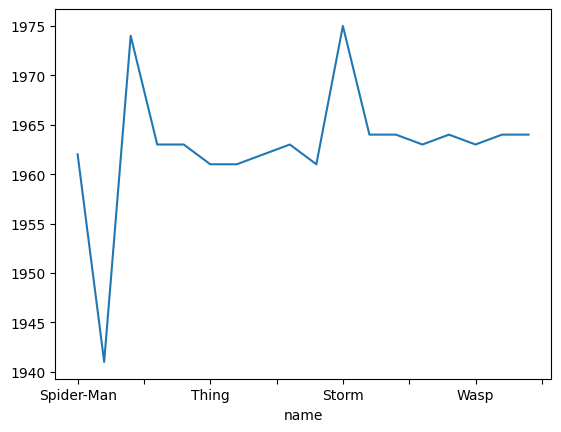

In [43]:
#plt.plot(marvel_df.index, marvel_df.first_appearance)
marvel_df.first_appearance.plot()

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Plot a histogram (plot.hist) with values of `first_appearance`


In [ ]:
# your code goes here


(array([ 1.,  0.,  0.,  0.,  0.,  3., 12.,  0.,  0.,  2.]),
 array([1941. , 1944.4, 1947.8, 1951.2, 1954.6, 1958. , 1961.4, 1964.8,
        1968.2, 1971.6, 1975. ]),
 <BarContainer object of 10 artists>)

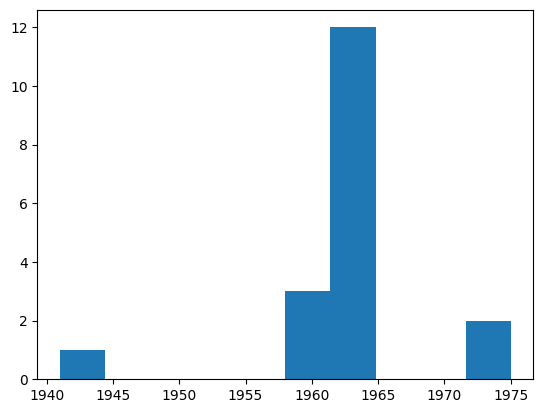

In [44]:

plt.hist(marvel_df.first_appearance)

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)
